##### Imports:

Rapport 



Under er rapport tilhørende kode til biofysikkprosjektet i TMA4320 våren 2022. 

Løsningne under er laget for å studere mikroskopiske bevegelser som er relevant for å forstå og forutsi hvordan celledeler oppstår. 
Koden er skrevet for å fremstille de mikroskopiske situasjonene visuelt, gjøre de nødvendige beregningene for å simulere et dynamiske system, samt å gjøre beregninger på data fra systemet for å forsøke å si noe om fysiske sammenhenger i den virkelige verden. 

I den første oppgaven er det monomerer som er «entitetene» vi fokuserer på. Vi starter med å opprette en matrise som representerer disse monomerne i et «dougnut/torus-univers», dvs. at bevegelser utenfor rammen av universet fortsetter inn fra den andre siden. På denne måten finnes det ingen grensebetingelser for hvor monomerne eksisterer i universet – de kan bevege ser rundt i uendeligheten uten å nå noen «ende av verden». Videre visualiserer vi universet ved et colormesh – en funksjon i matpolotlib som visualiserer matrisen vi har laget for lokaliseringen av monomere. I denne oppgaven er vi interessert i å simulere og undersøke et sentralt fysisk fenomen – nemlig at systemer ønsker å eksistere i sin laveste mulige energitilstand. Monomerne i universet vårt har alle en elektrisk ladning. Dersom to monomere med motsatt fortegn på sine respektive ladninger møtes, vil de danne en elektrisk binding. Dersom man ønsker å bryte denne bindingen vil det kreve energi. En kan da tenke seg at denne sammensetningen av monomere har en slags negativ energi i forhold til hva den samlede energien var før de ble satt sammen. Poenget er da at systemet ønsker å danne kjeder av monomere, kalt polymere, for å senke den totale energitilstanden i systemet. For å simulere dette gir vi monomerne et forhold til sine omgivelser. Dette gjøres ved å tilskrive hver monomer naboruter i matrisen. Dermed har vi en metode for å koble monomerne med sine omgivelser. 

Siden monomerne nå lever i omgivelser kan vi starte å endre systemet på en måte som ligner den virkelige verden. Ved implementasjonen av en MCMC-funksjon simulerer vi bevegelser av monomere i universet vårt. Her er det to typer bevegelser. Ved ethvert tidspunkt, $t$, vil en tilfeldig valgt monomer forsøke å gjøre en bevegelse. Denne bevegelsen består av en forflytning på ‘en rute i en tilfeldig retning. I koden sjekker vi at denne forflytningen er «lovlig» i henhold til reglene vi har spesifisert. En bevegelse av denne typen kan bare forekomme dersom den totale energien av systemet forblir likt eller minsker. Det er ikke lov for en monomer å flytte til en posisjon der det allerede eksisterer en monomer. Denne typen bevegelse skjer som sagt ved hvert tidsintervall, som er representert ved ‘en iterasjon av vår MCMC-funksjon. Den andre typen bevegelse skal simulere en tilfeldig forflyttelse som konsekvens av termiske krefter. Ved hvert tidsintervall er det en viss sannsynlighet for at en tilfeldig monomer blir flyttet i en tilfeldig retning. Siden denne bevegelsen skal representere kaotisk termisk vibrasjon vil sannsynligheten for at bevegelsen inntreffer være avhengig av temperaturen. Høyere temperatur fører til større sannsynlighet for bevegelse. Og det viktigste med denne formen for bevegelse er at den ikke tar hensyn til utviklingen av den totale energien i systemet. Så polymerne kan altså bli brutt opp av denne typen bevegelse.  

I slutten av oppgaven er vi interessert i å undersøke hvor lange disse kjedene av monomere blir for ulike temperaturer. Vi gjør dette ved å simulere 10 ulike systemer som varierer i temperatur. Vi ønsker å se på systemet i sin likevekt, og deretter tar vi n prøver av systemet for å få en god indikasjon for hvor lange polymerne er. Vi observerer at lengden faller drastisk for økning av temperatur. Det er forventet at gjennomsnittslengden av polymere skal gå ned, men for å se at endringen er så stor som den er for de første 100 kelvinene må vi se nærmere på kriteriet for termisk bevegelse. 

Essensen er at vi ønsker å lage en størrelse som bestemmer sannsyneligheten for termisk bevegelse slik at den skalerer realistisk med temperatur. Fra oppgaveheftet har vi uttrykket:

$e^{-\beta (E(S_{n})- E(S_{i}))}$ der $\beta$ er $\frac{1}{k_{B} \cdot T}$ og hele uttrykket er i størrelsesorden $\sim$ 10^-2. 

Med måten vi har implementert vår MCMC-funksjon blir uttrykket da en prosentandel som tilsvarer sannsynligheten for at den termsike bevegelsen skjer. Dette har stor innvirkning på den gjennomsnittlige lengde av polymerene som dannes. 

(I) Hvorfor er $\left<d \right>$ mindre for høyere temperaturer - T?

Først og fremst er det viktig å påpeke at "migrasjonen" av monomerne foruten den termiske bevegelsen som kommer fra elif-setningen i funksjonen MC er uanvhengig av temperaturen. Så det er nettopp denne termiske bevegelsen som gjør at simulasjonene får ulike resultater for ulike temperaturer. Om en ser bort fra den termiske bevegelsen vil de tilfeldige migrasjonene uanvhenig av temperatur forekommer kun dersom energien til systemet senkes som konsekvens av mirgrasjonen. Det vil si at dersom simulasjonen hadde fått gått lenge nok, og uten temrisk bevegelse - ville vi endt opp med kun 'en polymer bestående av alle monomerene i systemet. Antallet migrasjoner som forekommer som konsekvens av termisk bevegelse vil øke med temperaturen og vil føre til at polymere brytes opp ved at monomere migrerer til posisjoner som øker systemets totale energi - noe som kun er mulig gjennom termisk bevegelse-funksjonaliteten. 

(II) Diskuter hvorvidt valget av n (n_samples i koden) gir pålitelige resultater.

I et helt ideelt scenario ville systemet ha nådd en perfekt likevekt, og vi kunne i teorien bare valgt 'en måling etter at denne likevekten har intruffet, ettersom flere målinger bare ville gitt samme verdi. Dette er ikke tilfellet i simulasjonene siden vi har med den termiske bevegelsen. Så et riktig valg av n må på et vis reflektere at vi forsøker å fange opp usikkerheten til systemet i likevekt. La oss si at MC-funksjonen kaller elif-setningen med en gjenomsnittlig periode T. Da burde n legges slik at vi tar samples av et helt antall slike perioder. Slik at vi unngår å hverken over- eller underestimere den termiske bevegelsen i systemet best mulig. Til slutt valgte vi n = 30 ettersom dette er det minste antallet prøver en trenger for at gjennomsnittet av prøvene skal være tilnærmet normalfordeling. 

(III) Er noen av resultatene overraskende. 

Vi ser i plottene under 1h) at vi har veldig lav gjennomsnitlig lengde på polymere ved 300K. Dette er litt overraskende ettersom denne temperaturen er veledig nære kropstemperatur, og en skulle forvente at forholdene i kroppen skulle vært mer tilrettelagt for denne typen polymerisering. Dette peker til at det er andre forhold i kroppens celler som gjør at polymeriseringen forekommer til tross for temperaturen.

(IV) Hvorfor er variasjonen mellom simulajonene større ved lave temperaturer.

Variansen for målingene gjort ved lave temperaturer er veldig mye større en ved høye temperaturer. Grunnen til dette er at vi generelt har større polynomer ved lave temperaturer. Vi kan se for oss at vi ved 100K har 2 polynomer, begge med lengde 25. Da er $\left<d\right>$ lik 25. Men dersom den termiske bevegelsen forårsaker at en monomer hopper av og blir værende alene så blir $\left<d\right>$ lik  $\frac{50}{3}$ istedenfor $\frac{50}{2}$, en forskjell på 8.33 - som er veldig stort i denne sammenhengen. Om to monomere faller vekk på dette viset blir forskjellen 12.5 osv. Vi kan altså få veldig store utslag for variasjonen på $\left<d\right>$  ut i fra helt tilfeldige enkelthendelser. Derfor vil dette føre til store forskjeller mellom sumulasjoner. For høye temperaturer har bevegelser som beskrevet overfor mye mindre utslag. Dermed vil det fortsatt være forskjeller, men de er konsekvent mindre.  




I oppgave 2 er det polymere som er entitetene vi fokuserer på. Vi går frem på samme måte som i oppgave 1 med konstruksjon av et univers og en funksjon som danner polymere ved hjelp av en matrisestruktur. I denne oppgaven har vi også valgt å bruke objekt-orientert programmering til å representere dataene som hører til hver polymer. Vi ønsker å undersøke hvordan lengden av polymerne påvirker opphoping og sammensetting av disse. Denne opphopingen skjer ved at polymerne beveger seg rundt, men vi har ulike antakelser om hvordan dette kan se ut. Derfor implementerer vi to ulike typer bevegelse – rigid og medium fleksibel. Den rigide bevegelsen er den enkleste tilnærmingen til hvordan polynomer beveger seg, og er en grov forenkling, da den ikke tillater at polymeret bøyes. Medium fleksible-metoden er noe bedre, og vi kan tenke oss at den gir et innblikk i hvordan et system med monomere faktisk fungerer. Denne tillater bevegelse innad i et polynom, så sant det ikke brytes til flere polymerer. 

Monte Carlo-simuleringen i oppgave 2 gir oss ikke brukbare resultater ettersom det skjer en feil etter gjennomgått bevegelse, da bevegelsene virker tilsynelatende slik de skal. Feilen skjer mest sannsynlig ettersom vi har programmert objektorientert, og at variabler ikke blir oppdatert riktig. Dersom vi hadde hatt mer til ville det vært nyttig å forsøke å løse oppgaven på en annen måte, slik at daten er lettere å bearbeide. Vi forventer lignende resultater i oppgave 2 som i oppgave 1. 


##### Imports:

(!pip install numba)

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import random
import math
import time
from numba import jit

### Oppgave 1


##### 1a) og b) 
For å lage et tilfeldig system, genereres det 2M monomerer i et grid i setup_monomers(M,N). M monomerer med ladning -e og M med ladning +e. N bestemmer størelsen på gridet. 

Systemet blir så plottet ved hjelp av plot_grid(grid).

In [4]:
def setup_monomers(N, M):
    """
    Lager et grid med null elementer og noen tilfeldig plasserte ladninger (/monomer)

    input:
        (int) N: lengde på grid sidene
        (int) M: antall positive/negative monomers

    return:
        (numpy matrix (N x N)) grid (med 2 x M ikke null elementer)
    """

    #sampler "monomers":
    indexes = np.arange(0, N*N, 1).tolist() #tall fra 0 - N * N
    samples = random.sample(indexes, 2*M) #sample() sørger for at det ikke blir skapt duplikater.
    charges = np.concatenate((np.arange(-M, -0), np.arange(1, M+1))) #charges: -20, -19, ..., -1, 1, ..., 19, 20
    random.shuffle(charges) #shuffler ladningene
    
    #lager grid
    grid = np.zeros((N, N)) #tomt grid

    #fyller grid med ladninger (tilfeldig plassert):
    for j in range(len(samples)): 
        samp_index = samples[j] #sample index (fra 1d samples)
        index = (samp_index // N, samp_index % N) #1D -> 2D index
        grid[index] = charges[j] #legger til ladingen
        
    return grid

Tester setup_monomers funksjonen:

In [449]:
N = 11 #bredden på universet
M = 10 #antall positive/negative monomers

universe = setup_monomers(N,M)

print("grid size: ", universe.shape)
print("Number of grid elements: ", universe.shape[0] * universe.shape[1])
print("number of monomers:", len(np.transpose(np.nonzero(universe))))


grid size:  (11, 11)
Number of grid elements:  121
number of monomers: 20


Visualiserer med plt.colormesh()

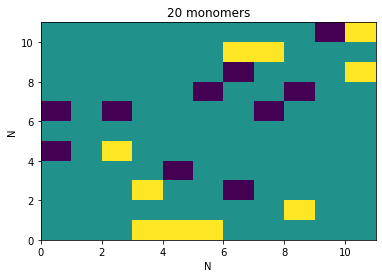

In [455]:
def plot_grid(grid):
    plt.pcolormesh(grid, vmin = -1, vmax = 1)
    N = grid.shape[0]
    M = np.count_nonzero(grid)
    plt.xlabel(f"N")
    plt.ylabel(f"N")
    plt.title(f"{M} monomers")
    plt.show()

plot_grid(universe)

#### 1c) 
get_neighbours(N, j, i) returnerer de 4 nabokoordinatene til \[j,i]

In [452]:
@jit(nopython=True)
def get_neighbours(N, i, j):
    """
    input:
        (int) N: grid størrelse
        (int) i, j: 2D koordinat til grid.
    return:
        (list<list<int>>) liste med de fire nabo posisjonene. Bruker modulo operatoren for å holde på doughnut-universe egenskapen.
    
    """
    left_i = (i - 1 + N) % N 
    right_i = (i + 1) % N
    above_j = (j - 1 + N) % N
    below_j = (j + 1) % N

    return [[left_i, j], [i, above_j], [right_i, j],[i, below_j]]

@jit(nopython=True)
def get_monomers(grid):
    """
    Finner indexer til ikke null elementer i grid.

    input:
        (numpy matrix (N x N)) grid med ladninger
    return:
        (list<list<int>>) index-er til "ikke-null" elementer i grid-et.
    """
    mons = []
    for i in range(grid.shape[0]):
        for j in range(grid.shape[1]):
            if(grid[i][j] != 0):
                mons.append([i, j])
    return mons


##### 1d)
Funksjon for total energi til monomer systemet:

In [453]:
@jit(nopython=True)
def total_energy(grid):
    """
    Søker gjennom monomene og summerer opp energien til systemet. 
    Regner ut energien for hvert NN par.
    
    pairs er en liste med alle nabo-monomer parene som algoritmen regner ut energien for.
    (bool) calculated_pair sørger for at vi ikke regner ut energien to ganger per par.

    input:
        (numpy matrix (N x N))) grid: mesh med ladninger
    return:
        (float) total energi til monomer-systemet.
    
    """
    e = 1.6e-19 #elementær ladning
    e_r = 78 #relative permitivity
    e_0 = 8.854188e-12 #elektrisk permitivitet
    a = 23e-6 #avstand mellom monomene
    
    alpha = e**2 / (4 * np.pi * e_0 * e_r * a**2)
    
    E = 0 #init
    
    N = grid.shape[0]
    monomers = get_monomers(grid) #returns a list with indexes corresponding to monomers
    pairs = []

    for i in range(len(monomers)):
        monomer = monomers[i]
        monomer_charge = grid[monomer[0], monomer[1]]
        neighbours = get_neighbours(N, monomer[0], monomer[1])
        for j in range(len(neighbours)):
            neighbour = neighbours[j]
            pair = [monomer, neighbour]
            reversed_pair = [pair[1], pair[0]]

            calculated_pair = (pair in pairs) or (reversed_pair in pairs) #true if already calculated.
            
            if(grid[neighbour[0], neighbour[1]] != 0.0 and not calculated_pair):
                pairs.append(pair)
                E += alpha * np.sign(monomer_charge * grid[neighbour[0], neighbour[1]]) #regner ut.
                
    return E

##### 1e)

Lager montecarlo algoritmen for monomer systemet:

In [35]:
#Definerer tallstørrelser som bruker i de kommende simulasjonene. 

T_l = 100   #Laveste temp vi skal simulere
T_h = 1000  #Høyeste temp vi skal simulere
TT = np.linspace(T_l, T_h, 10)  #TT blir en array med de ønskede temperaturene; 100K - 1000K
t_max = 100000  #Brukes til å regne antall steg til systemet er i likevekt
s = 1/200   #Brukes til å regne antall steg til systemet er i likevekt
C = 10000   #Brukes til å regne antall steg til systemet er i likevekt
t_r = 1000  #Avstand i steg mellom hver "prøve" av systemet. 
n_samples = 30  #Her setter antallet prøver, variablen n var tatt et annet sted.

@jit(nopython=True)
def t_equil(T):   #t_equil regner ut hvor mange iterasjoner simulasjonen skal kjøre før den starter prøvetakningen
    tx = t_max * np.exp(-s * (T - T_l)) + C 
    return tx


def get_Ns(T):  #Ns regner hvor mange iterasjoner simulasjonen skal kjøre. 
  return t_equil(T) + n_samples * t_r

70653.06597126334

In [36]:
@jit(nopython=True)
def MCM(Ns, T, init_grid): #monte carlo for monomer system
    """
    Montecarlo simulerings funksjon for monomer systemer. Simulerer Ns iterasjoner ved temperatur T.

    Input:
        (int) Ns: number of iterations
        (float) T: system temperature.
        (numpy matrix (N x N)) init_grid: initial mesh med ladninger.

    return:
        (numpy matrix (N x N)) grid etter Ns iterasjoner
        (list<float>) energies. Liste med energier evaluert for i funksjonen.
    """

    k_b = 1.38e-23
    beta = 1 / (k_b * T)
    eV = 1.602176634e-19
    
    count = [0, 0, 0] #teller hvor MC havner, i "if", "elif" eller "else"
    
    N = init_grid.shape[0] #størrelsen på grid
    M = np.count_nonzero(init_grid) / 2 #antall positive/negative ladninger

    #aproximasjon for likevekts temperaturen
    t_e = t_max * np.exp(-s * (T - T_l)) + C 

    grid = init_grid

    #finner ikke null elementer i grid-et
    monomers = get_monomers(grid) #gir indexer til ikke-negative ruter i grid. Aka, monomer 
    
    #liste med energier utregnet gjennom simuleringen:
    energies = [total_energy(grid)]

    #liste med prøver av systemet med gitte tidspunkt.
    samples = []

    print("starting simulation [ T =",T,"K, Ns =",Ns,", M =",M,", N =",N, "]")

    for it in range(Ns):
        #kopierer systemet
        prev_grid = grid.copy()
        prev_monomers = monomers.copy()

        #velger et tilfeldig monomer:
        rand_monomer_index = round(np.random.uniform(0, len(monomers)-1))
        prev_monomer = monomers[rand_monomer_index] #tilfeldig monomer index til grid.
        
        #plasserer monomeret i en tilfeldig nabo posisjon:
        new_monomer = get_neighbours(N, prev_monomer[0], prev_monomer[1])[round(np.random.uniform(0, 3))] #flyttet til naboposisjon.

        #monomene kan kun bevege seg til et tomt område, om illegalMove er True, så gjør vi prosedyren på ny.
        illegalMove = (grid[new_monomer[0], new_monomer[1]] != 0) 

        if(it >= int(t_e) and (it-int(t_e))%t_r == 0 and it <= Ns):     #I disse linjene tar vi "prøver" av rekken av iterasjoner. Når antallet iterasjoner har oversteget -
            samples.append(prev_grid)                                      # vårt anslag for når systemet har nådd likevekt blir det tatt en prøve. Deretter taes det en prøve hver tusende iterasjon.
        
        if illegalMove:
            continue #prøver på nytt. 
            #continue gjør at vi begynner på ny i loopen, og det som kommer etterpå blir da ikke gjort.
        
        #oppdaterer grid og monomer listen
        prev_index = (prev_monomer[0], prev_monomer[1])
        new_index = (new_monomer[0], new_monomer[1])

        charge = grid[prev_index] 
        grid[prev_index] = 0
        grid[new_index] = charge
        monomers[rand_monomer_index] = new_monomer

        new_energy = total_energy(grid) #energien til systemet etter grid er oppdatert
        
        #kriterier for steg i montecarlo:
        if new_energy <= energies[-1]: 
            energies.append(new_energy)
            count[0] += 1
            #endringen er akseptert

        elif random.uniform(0, 1) < np.exp(-beta * (new_energy - energies[-1])): #termisk bevegelse, elns. np.exp(-beta * (new_energy - energies[-1]))
            energies.append(new_energy)
            count[1] += 1
            #endringen er akseptert som resultat av termisk vibrasjon

        else:
            #endringen er ikke akseptert. Grid og monomer blir tilbakesatt til slik de var og energien er uforandret.
            grid = prev_grid 
            monomers = prev_monomers
            energies.append(energies[-1]) #energien til systemet  er ikke endret
            count[2] += 1
       
    print("simulation complete")
    
    return grid, [e / eV for e in energies], count, samples

##### 1f)


Simulerer to simuleringer ved T = 200K og T = 500K:

In [37]:
T1 = 200 #temperatur til simulering 1
T2 = 500 #temperatur til simulering 2

Ns = 50000 #antall iterasjoner

M = 25 #antall monomere
N = 15 #størrelse på grid

init = setup_monomers(N, M) #setter opp monomer systemet:

In [42]:
t0 = time.time()

output = [MCM(Ns, T1, init), MCM(Ns, T2, init)] #kjører simuleringene

t1 = time.time()
print(f"runtime: {t1-t0} seconds") #printer runtime

starting simulation [ T = 200 K, Ns = 50000 , M = 25.0 , N = 15 ]
simulation complete
starting simulation [ T = 500 K, Ns = 50000 , M = 25.0 , N = 15 ]
simulation complete
runtime: 11.753645181655884


Her ser vi hvor monte carlo simuleringene ender opp gjennom simuleringen. Som du ser på T = 200, så er "else" tilfellet dominerende. Dette er fordi energien ofte ikke er mindre etter en bevegelse, så i mesteparten av tilfellene beveger ikke monomerene seg. Dette gjør at hver bevegelse blir mer presis og bidrar mer til å minimere systemets energi. I T = 500 er det mer tilfeldige bevegelse på grunn av temperatur bidraget. Dette gjør at vi får mer kaos.

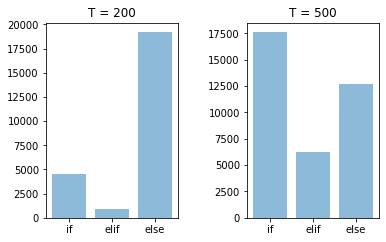

In [47]:
#visualiserer oppførselen til MCM algoritmen:

fig, axs = plt.subplots(1, 2)

objects = ("if", "elif", "else")
y_pos = np.arange(len(objects))

axs[0].set_title(f"T = {T1}")
axs[1].set_title(f"T = {T2}")
axs[0].bar(y_pos, output[0][2], align='center', alpha=0.5)
axs[1].bar(y_pos, output[1][2], align='center', alpha=0.5)
axs[0].set_xticks(y_pos, objects)
axs[1].set_xticks(y_pos, objects)
fig.tight_layout(pad=3.0)

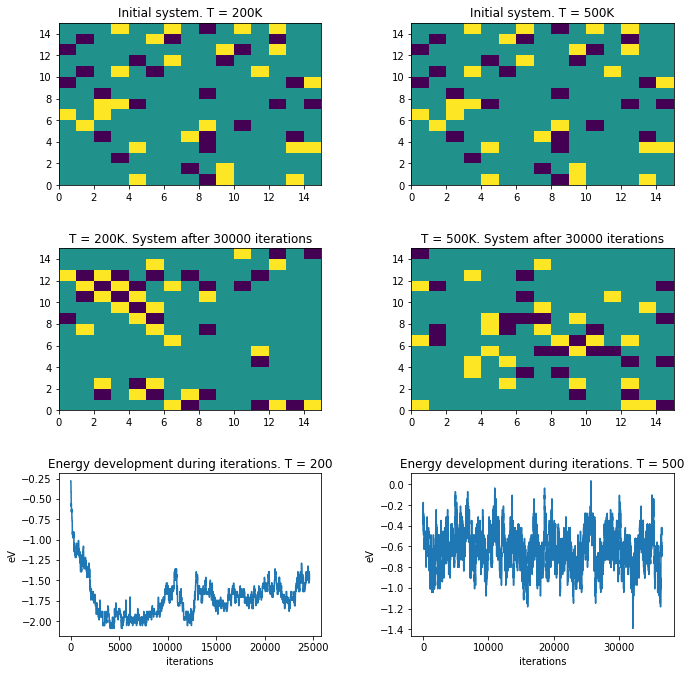

In [454]:
fig, axs = plt.subplots(3, 2, figsize = (10, 10))
axs[0][0].pcolormesh(init, vmin = -1, vmax = 1)
axs[0][0].set_title(f"Initial system. T = {T1}K")
axs[0][1].pcolormesh(init, vmin = -1, vmax = 1)
axs[0][1].set_title(f"Initial system. T = {T2}K")
axs[1][0].pcolormesh(output[0][0], vmin = -1, vmax = 1)
axs[1][0].set_title(f"T = {T1}K. System after {Ns} iterations")
axs[1][1].pcolormesh(output[1][0], vmin = -1, vmax = 1)
axs[1][1].set_title(f"T = {T2}K. System after {Ns} iterations")
axs[2][0].plot(np.arange(0, len(output[0][1]), 1), output[0][1])
axs[2][0].set_title(f"Energy development during iterations. T = {T1}")
axs[2][0].set_ylabel("eV")
axs[2][0].set_xlabel("iterations")
axs[2][1].plot(np.arange(0, len(output[1][1]), 1), output[1][1])
axs[2][1].set_title(f"Energy development during iterations. T = {T2}")
axs[2][1].set_ylabel("eV")
axs[2][1].set_xlabel("iterations")
fig.tight_layout(pad=3.0)

##### 1g)


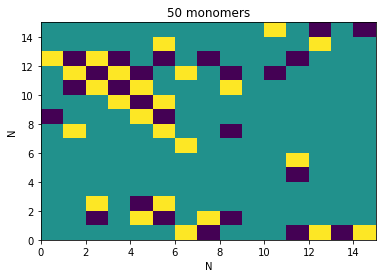

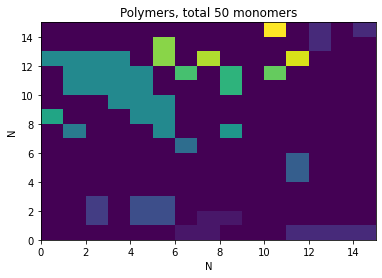

In [458]:
from pprint import pprint


class Monomer:
    '''
    Inneholder variabler: Posision, checked, neighbours, number
    Inneholder funksjoner: set_neighbour(neighbour), give_number(number), og __str__().
    '''
    def __init__(self, position):
        self.position = position
        self.checked = False
        self.neighbours = []
        self.number = 0
    
    def set_neighbour(self, neighbour):
        '''
        Legger til en nabo i nabolista til monomer
        '''
        if neighbour.position not in [n.position for n in self.neighbours]:
            self.neighbours.append(neighbour)
    
    def give_number(self, number):
        '''
        Oppdaterer nummer til et monomer så lenge den ikke er sjekket
        '''
        if not self.checked:
            self.checked = True
            self.number = number
            for neighbour in self.neighbours:
                neighbour.give_number(number)
    
    def __str__(self):
        #Brukes for debugging. Printer ut monomerene pent
        return f"{self.position}, number={self.number},"

    def __repr__(self):
        return self.__str__()

def occupied_neighbours(grid, monomer: "Monomer", all_monomers: "list[Monomer]"):
    acutal_neighbours = []
    all_neighbours = list(tuple(coordinate) for coordinate in get_neighbours(grid.shape[0], *monomer.position))
    for potential_monomer in all_monomers:
        if potential_monomer.position in all_neighbours:
            acutal_neighbours.append(potential_monomer)

    return acutal_neighbours


def color_neighbors_dfs(number: "int", grid: "np.ndarray", start: "list[int, int]", used_positions: "set"):
    '''
    Bruker depth fist search til å farge alle monomerene som henger sammen. 
    Input: 
        number, grid, start, used_positions
    Return: 
        used_positions, nå lagt til nabomonomerer
    '''
    grid[start[0], start[1]] = number
    # Kan få bedre kjøretid ved å bruke set
    neighbors = get_neighbours(grid.shape[0], start[0], start[1])
    while(len(neighbors) > 0):
        current = tuple(neighbors.pop())
        if (grid[current[0], current[1]] != 0 and current not in used_positions):
            grid[current[0], current[1]] = number
            used_positions.add(current)
            neighbors += get_neighbours(grid.shape[0], current[0], current[1])
    return used_positions

def cluster_grid(grid, give_number_of_groups=False, start_number=1):
    '''
    Farger alle sammenehengende monomerer samme farge / tilordner dem samme tall i grid
    input:
        grid, startnummer
    output: 
        grid. 
        Dersom give_number_of_groups = True returneres også antall polymerer i griddet. 
    '''
    grid = grid.copy()
    used_positions = set()
    found_polymer = 0
    for i in range(grid.shape[0]):
        for j in range(grid.shape[1]):
            if grid[i][j] != 0 and (i,j) not in used_positions:
                found_polymer += 1
                used_positions.add((i,j))
                used_positions = color_neighbors_dfs(start_number, grid, [i, j], used_positions)
                start_number += 1
    if give_number_of_groups:
        return grid, found_polymer
    return grid

def plot_cluster(grid): #Function for plotting a mesh whith color gradient
    plt.pcolormesh(grid) 
    N = grid.shape[0]
    M = np.count_nonzero(grid)
    plt.xlabel(f"N")
    plt.ylabel(f"N")
    plt.title(f"Polymers, total {M} monomers")
    plt.show()


clustered = cluster_grid(output[0][0])
plot_grid(output[0][0])
#print(clustered) #Shows the numbervalue representing each polymer
plot_cluster(clustered) 

def get_polymers(grid):
    nonzero_elems = cluster


In [112]:
def ClusterSizes(clusterGrid):
    
    clusterList = np.concatenate(clusterGrid) #Gjør matrisen som inneholder monomerne om til 'en lang liste.
    polPositions = np.zeros(int(np.nanmax(clusterList) + 1)) #Samlingene av monomere er numerert. Her passer jeg på at alle
    nr = 1                                                   #posisjons-listen har nok plass til alle indexer
    for j in range(len(polPositions)):
        for i in range(len(clusterList)):
            if(clusterList[i] == nr): #Dersom iteratoren er lik tallet i listen økes posisjonen i polPositions i index nr
                polPositions[nr] += 1
            else: continue
        nr +=1
    polSizes = []
    
    x = np.nonzero(polPositions)[0] #Np.nonzero returnerer en liste over posisjonene til elementer ulik 0
    for j in x:                     #Derfor henter vi disse elementene og legger de i en egen liste. 
        polSizes.append(polPositions[j])
    
    
    
    return polSizes #Returnerer array med lengdene til polynomene

In [459]:

M = 20

def Sim():
    """
    Simulerer systemet ved de ulike temperaturene
    """
    
    AllSizes = [] #Liste som vil inneholde alle polymer-størrelser fra alle prvøer for alle simulasjoner
    AllMeans = [] #Liste som vil inneholde alle gjennomsnittlige lengder for alle prøver for alle simulasjoner.
   
    for i in range(len(TT)):
    
        init = setup_monomers(N, M) #Ny initial grid for hver ulike temperatur.
        it = MCM(int(get_Ns(TT[i])), TT[i], init)[3] #Her hentes prøvene fra MC-iterasjonen

        SystemSizes = [] #Liste som inneholder alle polynom-størrelser for alle prøver i en enkel simulasjon
        SystemMeans = [] #Liste som inneholder alle gjennomsnitlige lengder for alle prøver i en enkel simulasjon

        for j in range(len(it)):
            clusterIt = cluster_grid(it[j]) #cluster_grid tilskriver sammenliggende monomere samme tall
            Sizes = ClusterSizes(clusterIt) #Teller lengder som beskrevet i ClusterSizes
            Mean = np.sum(Sizes)/len(Sizes) #Finner d-bar ved estimatoren som tar empirisk gjennomsnitt. 
            SystemSizes.append(Sizes) 
            SystemMeans.append(Mean)
            

        AllSizes.append(SystemSizes)
        AllMeans.append(SystemMeans)
    
    totalMeans = []
    for i in range(len(AllSizes)):
        SimSizes = np.concatenate(AllSizes[i])
        totalMeans.append(np.sum(SimSizes)/(len(SimSizes)))
    
    return AllSizes, AllMeans, totalMeans #Returnerer lsiter med alle lengder av alle polynomer i alle simulasjoner, 
                                            #liste med alle gjennomsnitt for alle "samples", og gjennomsnitt for hver totale simulasjon

SampleSolutions = Sim()
SampleSolutions_2 = Sim()

starting simulation [ T = 100.0 K, Ns = 113712 , M = 20.0 , N = 11 ]
simulation complete
starting simulation [ T = 200.0 K, Ns = 84709 , M = 20.0 , N = 11 ]
simulation complete
starting simulation [ T = 300.0 K, Ns = 67117 , M = 20.0 , N = 11 ]
simulation complete
starting simulation [ T = 400.0 K, Ns = 56447 , M = 20.0 , N = 11 ]
simulation complete
starting simulation [ T = 500.0 K, Ns = 49976 , M = 20.0 , N = 11 ]
simulation complete
starting simulation [ T = 600.0 K, Ns = 46051 , M = 20.0 , N = 11 ]
simulation complete
starting simulation [ T = 700.0 K, Ns = 43670 , M = 20.0 , N = 11 ]
simulation complete
starting simulation [ T = 800.0 K, Ns = 42226 , M = 20.0 , N = 11 ]
simulation complete
starting simulation [ T = 900.0 K, Ns = 41350 , M = 20.0 , N = 11 ]
simulation complete
starting simulation [ T = 1000.0 K, Ns = 40819 , M = 20.0 , N = 11 ]
simulation complete
starting simulation [ T = 100.0 K, Ns = 113712 , M = 20.0 , N = 11 ]
simulation complete
starting simulation [ T = 200

##### 1h)


Koden og plottet under er til for å bedre forstå hvordan og i hvilken grad den gjennomsnittlige lengden av polymere variere. Som vi ser er det relativt stor variasjon mellom ulike målinger, selv om de er kun tusen iterasjoner unna hverandre. 

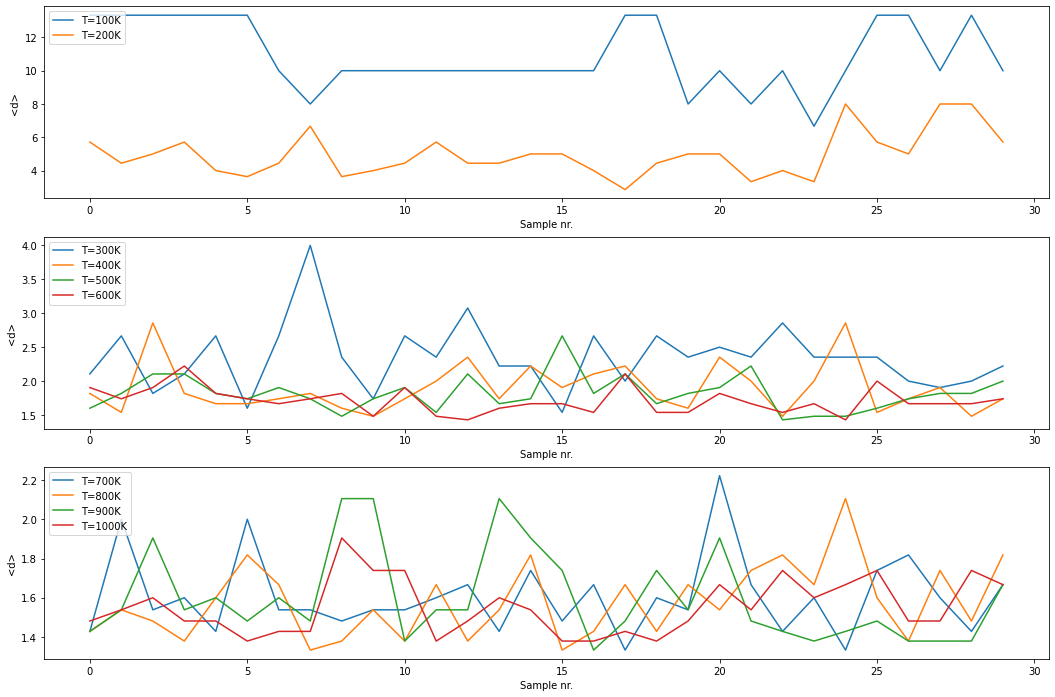

In [346]:
#Plotter den gjennomsnittlige lengden til polymerene i hver prøve for de 10 simulasjonene.
n_samples = 30

x_axis = np.arange(0,n_samples,1) 
fig, axs = plt.subplots(3, 1,figsize=(18,12))

axs[0].plot(x_axis, SampleSolutions[1][0], label="T=100K") 
axs[0].plot(x_axis, SampleSolutions[1][1], label="T=200K") 
axs[1].plot(x_axis, SampleSolutions[1][2], label="T=300K") 
axs[1].plot(x_axis, SampleSolutions[1][3], label="T=400K") 
axs[1].plot(x_axis, SampleSolutions[1][4], label="T=500K") 
axs[1].plot(x_axis, SampleSolutions[1][5], label="T=600K") 
axs[2].plot(x_axis, SampleSolutions[1][6], label="T=700K") 
axs[2].plot(x_axis, SampleSolutions[1][7], label="T=800K") 
axs[2].plot(x_axis, SampleSolutions[1][8], label="T=900K") 
axs[2].plot(x_axis, SampleSolutions[1][9], label="T=1000K")
axs[0].set_xlabel("Sample nr.")
axs[1].set_xlabel("Sample nr.")
axs[2].set_xlabel("Sample nr.")
axs[0].set_ylabel("<d>")
axs[1].set_ylabel("<d>")
axs[2].set_ylabel("<d>")
axs[0].legend(loc='upper left')
axs[1].legend(loc='upper left')
axs[2].legend(loc='upper left')

plt.show()

Text(0.5, 0, 'Temperatur i kelvin')

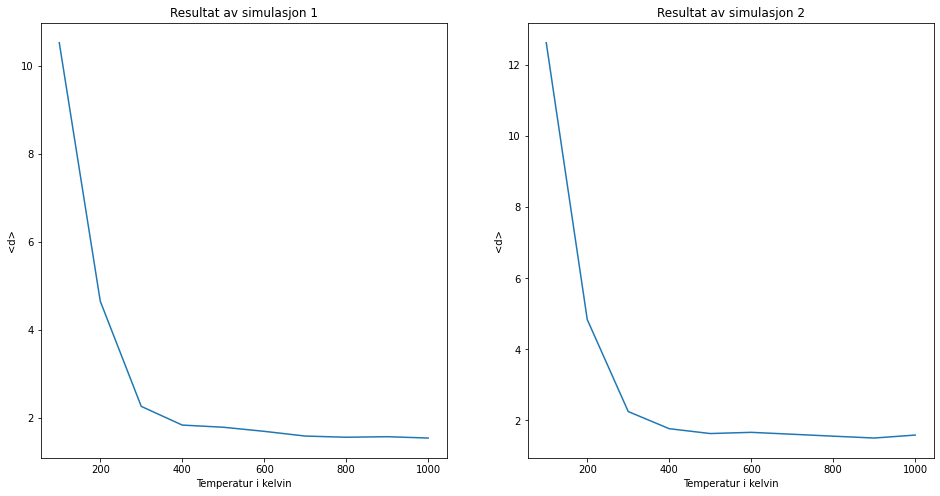

In [456]:
#Plotter gjennomsnittlig lengde  på polymere ved ulike temperaturer over alle "samples".

x_axis = np.arange(100,1100,100)
fig, axs = plt.subplots(1,2,figsize=(16,8))
axs[0].plot(x_axis, SampleSolutions[2])
axs[1].plot(x_axis, SampleSolutions_2[2])
axs[0].set_title("Resultat av simulasjon 1")
axs[1].set_title("Resultat av simulasjon 2")
axs[0].set_ylabel("<d>")
axs[1].set_ylabel("<d>")
axs[0].set_xlabel("Temperatur i kelvin")
axs[1].set_xlabel("Temperatur i kelvin")

### Oppgave 2

##### 2a)


In [266]:
class Polymer: 
    def __init__(self, monomers_coordiantes, grid): #Tar inn en liste med monomerer som utgjør polynomet
        self.monomers = [Monomer(tuple(monomer)) for monomer in monomers_coordiantes] #Liste med alle inngående monomerer
        self.monomer_list = monomers_coordiantes
        self.charge = grid[monomers_coordiantes[0][0]][monomers_coordiantes[0][1]]
        self.checked = False 
        self.size = len(self.monomers)
        self.neighbours = [] #list of coordinates of the neighbouring monomers of the polymer

  
    def update_polymer_number(self, grid):
        #Uppdaterer nummeret til alle monomerene i polymeret
      for monomer in self.monomers: 
        grid[monomer[0]][monomer[1]] = self.charge
      return grid 

    def __str__(self): #Brukt til debugging. Printer ut alle monomerene i et polymer
        return str(self.monomers)



def get_polymer_neighbours(i, polymers, grid):
    """
    Input:
        (int) i: index til polymers som representerer polymer objektet
        (list<Polymer>) polymers: holder på Polymer objektene.
        (numpy matrix (N x N)) grid: mesh med ladninger

    return:
        (list<list<int>>) neighbour_points: punkter til et annet polymer som er nabo til polymers[i]
    """
    polymer = polymers[i]
    neighbour_points = []
    
    #funksjon for å sjekke om monomeret er inni polymeret.
    isInside = lambda monomer, index: (monomer in polymers[index])

    for j in range(len(polymer)):
        #søker gjennom alle monomerene og sjekker om de har en nabo i et annet polymer.
        monomer = polymer[j]
        
        #sjekker naboene til monomeret j
        neighbours = get_neighbours(grid.shape[0], monomer[0], monomer[1])
        for k in range(0, 3):

            neighbour = neighbours[k]
            
            if(isInside(neighbour, i) or grid[neighbour[0], neighbour[1]] == 0):
                #Nabo monomeret er inni det samme polymeret eller naboen er ikke et monomer. (=null)
                continue 
            else:
                neighbour_points.append(neighbour)
            
    
    return neighbour_points

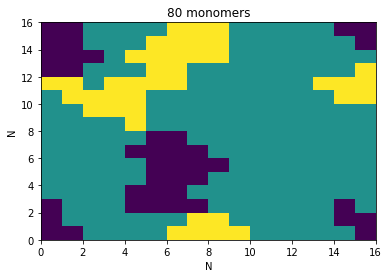

In [355]:

def setup_polymers(N, M, L):
    """
    Lager "kunstige" polymerer. Finner et tilfeldig punkt på et grid og bygger ut L monomere. Disse
    blir plassert fra et tilfeldig monomer i polymeret i en tilfeldig nabo posisjon.

    Om det ikke er mulig å plassere ut et monomer (pga plass/naboer) så bruker den rekursjon til å begynne på nytt med nye tilfeldige punkter osv.

    input:
        (int) N: grid størrelse
        (int) M: antall positive/negative polymerer
        (int) L: antall monomer per polymer.

    return:
        (numpy matrix (N x N)) grid med utplasserte positive og negative polymerer.
    """

    grid = np.zeros((N, N))
    polymers = [] #liste med de kontstruerte polymerene
    polymer_list = [] #Liste av polymer-coorinater

    indexes = np.arange(0, N*N, 1).tolist() #må være liste for at sample skal fungere
    samples = random.sample(indexes, 2*M) #sample() sørger for at det ikke blir skapt duplikater.
    charges = np.concatenate(([-1 for _ in range(M)], [1 for _ in range(M)]))
    random.shuffle(charges) #shuffler ladningene

    for i, charge in enumerate(charges):
        index = (samples[i] // N, samples[i] % N) #random 2D index

        posArr = [] #monomer position array
        posArr.append([index[0], index[1]])
        
        j = 1
        it = 0
        while j <= L:
            if(it > len(posArr) * 4):
                #ingen mulige plasseringer. Prøver igjen.
                return setup_polymers(N, M, L)
            it+=1
            
            randomIndex = round(np.random.uniform(0, len(posArr)-1))
            
            randMonomer = posArr[randomIndex]
            neighbouring_indexes = get_neighbours(N, randMonomer[0], randMonomer[1])
            neighbouring_charges = [grid[int(n[0]), int(n[1])] for n in neighbouring_indexes]
            nonzero_neighbours = [neighbouring_indexes[i[0]] for i in np.transpose(np.nonzero(neighbouring_charges))]

            for k, element in enumerate(nonzero_neighbours):
                if element == []:
                    nonzero_neighbours.pop(k)

            random_neighbour = neighbouring_indexes[round(np.random.uniform(0, len(neighbouring_indexes)-1))]
            
            if random_neighbour in nonzero_neighbours:
                continue
            
            grid[int(random_neighbour[0]), int(random_neighbour[1])] = charge
            posArr.append(random_neighbour)
            j+=1
        
        this_polymer = Polymer(posArr, grid)
        polymers.append(this_polymer)
        polymer_list.append(this_polymer.monomer_list)

    for i in range(len(polymer_list)):
        polymers[i].neighbours = get_polymer_neighbours(i, polymer_list, grid)
        
    return grid, polymers



poly_grid, polymers = setup_polymers(16, 2, 20) 
polymer_list1 = [p.monomer_list for p in polymers]
neighbs = get_polymer_neighbours(1, polymer_list1, poly_grid)
plot_grid(poly_grid)


##### 2b)


In [282]:
e = 1.6e-19 #elementær ladning
e_r = 78 #relative permitivity
e_0 = 8.854188e-12 #elektrisk permitivitet
a = 23e-6 #avstand mellom monomene
alpha = e**2 / (4 * np.pi * e_0 * e_r * a**2)


def total_energy_plymer(grid, polymers_objects):
    """
    Finner total energi til polymer-systemet. Sørger for at vi ikke regner ut bindingsenergien 
    for et par to ganger.

    input:
        (numpy matrix (N x N)) grid: mesh med ladninger
        (list<Polymer>) polymer_objects: liste med Polymer-objekter.

    return:
        (float) energien til systemet i joule.
    """
    
    E = 0 #init
    polymers = []
    #print(polymers_objects)
   
    
    for Polymer in polymers_objects:
        #print(polymer)
        polymers.append(Polymer.monomer_list)

    charges = {} #contains polymer-index with its respective charge
    checked_pairs = [] #index-pairs (to polymer list) that is calculated for.
    
    for i in range(len(polymers)): #calculating polymer charges
        charge = 0 #charge for polymer i
        
        for j in range(len(polymers[i])):
            monomer = polymers[i][j]
            charge += grid[monomer[0], monomer[1]]
        charges[i] = charge

    for i in range(len(polymers)): #calculating polymer-polymer bonding energies.
        polymer = polymers[i]
        neighbouring_indexes = get_polymer_neighbours(i, polymers, grid)
        if(neighbouring_indexes):
            #neighbouring_indexes is not a empty list. Meaning there is one or more neighbours.
            for j in neighbouring_indexes:
                pair = [i, j] #current pair
                if([i, j] not in checked_pairs or [j, i] not in checked_pairs):
                    #The pair is not calculated for. 
                    checked_pairs.append(pair)
                    E += alpha * np.sign(charges[i] * charges[i])

        else: continue #no neighbours.

    return E

##### 2c)

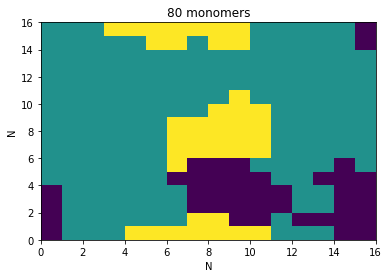

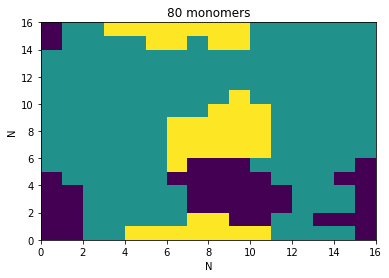

In [491]:
def rigid_move(grid, polymers: "list[Polymer]",polymer: "Polymer", direction: "[0,1,2,3]", return_polymers = False): #Returns grid with moved polymer if valid move
    '''
    Flytter et monomer ett steg i en retning. Dersom polynomet kræsjer med et annet polynom blir ikke flyttet tillatt, og det orginale gridet blir returnert
    
    Input: 
        grid, polymers (list[Polymer], polymer (Polymer), direction [0,1,2,3], return_polymers (Bool). 
    Return:
        Oppdatert grid. 
        Returnerer også oppdatert lista med polymerer dersom return_polymer = True
    '''

    N = grid.shape[0]
    new_grid = grid.copy()
    prev_polymers = polymers.copy()

    #removing the old polymer from new_grid. 
    for monomer in polymer.monomers: 
        new_grid[monomer.position[0]][monomer.position[1]] = 0

    if(direction == 0):
        d = [1, 0]
    elif(direction == 1):
        d = [0, 1]
    elif(direction == 2):
        d = [-1, 0]
    elif(direction == 3):
        d = [0, -1]
    else:
        print("invalid direction integer")

    for monomer in polymer.monomers:
        if [(monomer.position[0] + d[0])%N ,(monomer.position[1]+d[1])%N] in polymer.neighbours: #cheking if any of the new moves cross a neighbour
            
            if return_polymers:
                return grid, polymers
            else: 
                return grid     #If move is not valid, return grid without any change
            

    for i in range(len(polymer.monomers)):
        old_pos = polymer.monomers[i].position
        new_pos = [(old_pos[0]+d[0])%N,(old_pos[1]+d[1])%N]
        polymer.monomers[i].position = new_pos #Updating monomer posision
        polymer.monomer_list[i] = new_pos #Updateing monomer_list
        #updating grid: 
        new_grid[new_pos[0]][new_pos[1]] = polymer.charge


    #updating neighbours
    polymer_list = []
    for polymer in polymers:
        polymer_list.append(polymer.monomer_list) #Making a list of list to be used in get_polymer_neighbours 
    for i in range(len(polymer_list)):
        polymers[i].neighbours = get_polymer_neighbours(i, polymer_list, new_grid)
    
    #print(polymer.neighbours)
    #print(polymer)

    if(len(np.transpose(np.nonzero(new_grid))) != len(np.transpose(np.nonzero(grid)))):
        polymers = prev_polymers
        if (return_polymers):
            return grid, polymers
        return grid
        
    if (return_polymers):
        return new_grid, polymers

    return new_grid

poly_grid, polymers = setup_polymers(16, 2, 20) 
plot_grid(poly_grid)
new_grid = rigid_move(poly_grid, polymers,polymers[0], 1)
plot_grid(new_grid)


##### 2d)


In [482]:
def MCP(Ns, T, init_grid, init_polymers, movetype):
    """
    Monte carlo simulering for polymer-system. Velger tilfeldige polymer-objekter og beveger de i tilfeldige retninger.

    Input:
        (int) Ns: antall iterasjoner.
        (numpy matrix (2 x 2))init_grid: mesh/grid med ladninger plassert utover i polymer mønster. 
        (list<Polymer>) polymers: liste med polymer objekter.
        (def) movetype: bevegelses funksjonen. (rigid_move || flex_move medium_flex_move osv..)

    return:
        (numpy matrix (2 x 2)) grid: mesh/grid etter Ns iterasjoner
        (list<float>) energies: liste med energi evalueringer.
    """

    grid = init_grid.copy()
    polymers = init_polymers.copy()

    #Physical constants:
    k_b = 1.38e-23
    beta = 1 / (k_b * T)
    eV = 1.602176634e-19
        
    N = init_grid.shape[0]
    M = len(polymers) / 2

    print("starting simulation [ T =",T,"K, Ns =",Ns,", M =",M,", N =",N, "]")

    energies = [total_energy_plymer(init_grid, polymers)]
    grid = init_grid
    
    tmp = 0
    for it in range(Ns):

        #beveger et tilfeldig polymer i en tilfeldig retning
        rand_poly_index = round(np.random.uniform(0, len(polymers)-1))
        polymer_obj = polymers[rand_poly_index]

        temp_grid, temp_polymers = movetype(grid, polymers, polymer_obj, round(np.random.uniform(0, 3)), True) #movetype returnerer det nye grid-et om det er mulig å gøre bevegelsen
        
        #debug:
        if(len(np.transpose(np.nonzero(temp_grid))) != len(np.transpose(np.nonzero(grid)))):
            print(f"Monomer error! Stopping simulation after {tmp} moves\n")
            return grid, energies
        tmp+=1

        #beregner systemets totale energy etter et move
        new_energy = total_energy_plymer(temp_grid, temp_polymers)

        #Monte carlo kriterier for et successfull steg
        if new_energy <= energies[-1]:
            energies.append(new_energy)
            grid = temp_grid
            polymers = temp_polymers
        
        elif random.uniform(0, 1) <= np.exp(-beta * (new_energy - energies[-1])):
            energies.append(new_energy)
            grid = temp_grid
            polymers = temp_polymers

        else:
            energies.append(energies[-1])
            
            
        #the move function returns a unchanged grid if the move was a illegal move. So we dont need to reset anything, like we did in MCM().

        if it/Ns % 0.1 == 0: #showing progress.
            print(it/Ns * 100, "%")

    print("100.0%")
    print("Simulation complete.")
    return grid, [e / eV for e in energies] #converting energies to electron volts.

       

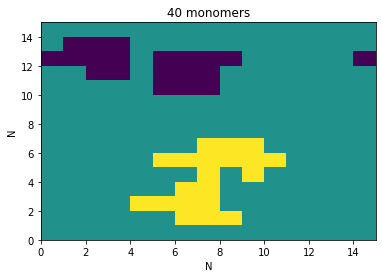

In [473]:
unfixed_grid, unfixed_pollys = setup_polymers(15, 2, 10)
plot_grid(unfixed_grid)

In [483]:
fixed_grid, fixed_energies = MCP(30000, 300, unfixed_grid, unfixed_pollys, rigid_move)

starting simulation [ T = 300 K, Ns = 30000 , M = 2.0 , N = 15 ]
0.0 %
10.0 %
20.0 %
40.0 %
80.0 %
100.0%
Simulation complete.


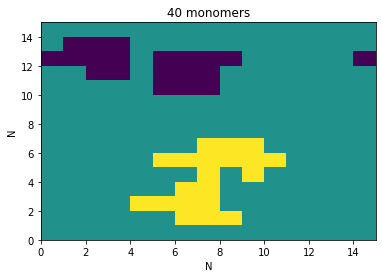

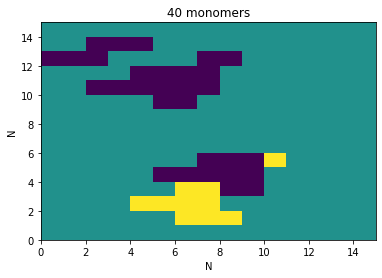

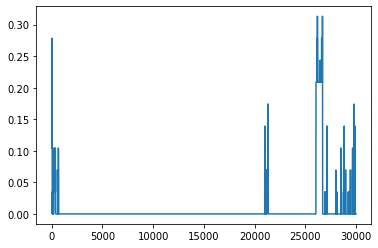

[0.4176398583667053, 0.4176398583667053, 0.4176398583667053, 0.4176398583667053, 0.4176398583667053, 0.4176398583667053, 0.4176398583667053, 0.4176398583667053, 0.4176398583667053, 0.4176398583667053, 0.4176398583667053, 0.4176398583667053, 0.4176398583667053, 0.4176398583667053, 0.4176398583667053, 0.4176398583667053, 0.4176398583667053, 0.4176398583667053, 0.4176398583667053, 0.4176398583667053, 0.4176398583667053, 0.4176398583667053, 0.4176398583667053, 0.4176398583667053, 0.4176398583667053, 0.4176398583667053, 0.4176398583667053, 0.4176398583667053, 0.4176398583667053, 0.4176398583667053, 0.4176398583667053, 0.4176398583667053, 0.4176398583667053, 0.4176398583667053, 0.4176398583667053, 0.4176398583667053, 0.4176398583667053, 0.4176398583667053, 0.4176398583667053, 0.4176398583667053, 0.4176398583667053, 0.4176398583667053, 0.4176398583667053, 0.4176398583667053, 0.4176398583667053, 0.4176398583667053, 0.4176398583667053, 0.4176398583667053, 0.4176398583667053, 0.4176398583667053,

In [485]:
plot_grid(unfixed_grid)
plot_grid(fixed_grid)
plt.plot(np.arange(0, len(fixed_energies), 1), fixed_energies)
plt.show()
print(flexed_energies)

##### 2e) og 2f)
Medium_flexibility_move() i kodeblokken under beveger polynomer hvor medium flexibility er tillatt. Det vil si at monomerer i et polynom kan flytte på seg så lenge polynomet ikke deles opp. Selve flyttingen skjer her, og polymer_is_broken() sjekker hvorvidt polynomet er ødelagt. Denne tar inn ett polynom, sender det gjennom cluster_grid() og ser om det tilsvarer to separate polynom. Dersom dette er tilfellet vil flyttet ikke være tillatt, og det orginale griddet vil returnert.  

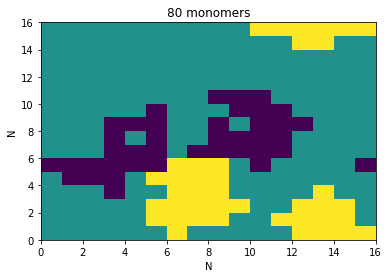

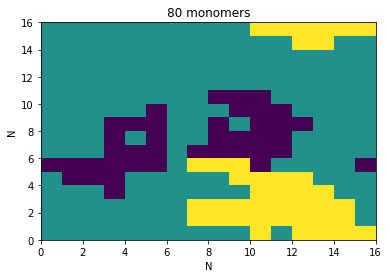

In [464]:
def polymer_is_broken(grid, polymer) -> "bool": #Returns true if polymer is broken
    #Lager et tomt grid
    new_grid = np.zeros((grid.shape[0], grid.shape[0]))
    #Tegner på polymeret 
    for monomer_pos in polymer.monomer_list:
        new_grid[monomer_pos[0]][monomer_pos[1]] = 1
    
    _, found_polymers = temp_cluster_grid(new_grid, True)
    return found_polymers > 1


def medium_flexibility_move(grid, polymers ,polymer, direction, return_polymers = False):
    '''
    Flytter et monomer ett steg i en retning. 
    
    Innput: 
        grid, polymers (list[Polymer], polymer (Polymer), direction [0,1,2,3], return_polymers (Bool). 
    Return:
        Oppdatert grid. 
        Returnerer også oppdatert lista med polymerer dersom return_polymer = True
    '''
    N = grid.shape[0]
    new_grid = grid.copy()
    polymer_copy = Polymer(polymer.monomer_list, grid)
#    print(polymer)

    #removing the old polymer from new_grid. 
    for monomer in polymer.monomers: 
        new_grid[monomer.position[0]][monomer.position[1]] = 0

    if(direction == 0):
        d = [1, 0]
        locked_coordinate = 1
    elif(direction == 1):
        d = [0, 1]
        locked_coordinate = 0
    elif(direction == 2):
        d = [-1, 0]
        locked_coordinate = 1
    elif(direction == 3):
        d = [0, -1]
        locked_coordinate = 0 
    else:
        print("invalid direction integer")
    
    locked = [] #contains all rows/columns that can not be moved

    #Getting which columns are locked
    for monomer in polymer.monomers:
        new_pos = [(monomer.position[0]+d[0])%N,(monomer.position[1]+d[1])%N]
        if (grid[new_pos[0]][new_pos[1]] != 0) and (new_pos not in polymer.monomer_list):
            locked.append(new_pos[locked_coordinate])

    #Move all movable monomers (only in new_grid), and change polymer copy

    for i in range(len(polymer_copy.monomers)):
        monomer_copy = polymer_copy.monomers[i]
        #If monomer is locked, redraw the same position in new_grid
        if (monomer_copy.position[locked_coordinate] in locked):
            new_grid[monomer_copy.position[0]][monomer_copy.position[1]] = polymer.charge
        
        #If not, change position and redraw
        else: 
            old_pos = monomer_copy.position
            new_pos = [(old_pos[0]+d[0])%N,(old_pos[1]+d[1])%N]
            monomer_copy.position = new_pos #giving monomer new pos
            new_grid[new_pos[0]][new_pos[1]] = polymer.charge

    polymer_copy.monomer_list = []
    for monomer_copy in polymer_copy.monomers:
        polymer_copy.monomer_list.append(monomer_copy.position)
    #if the polymer is broken: return the original grid
    if polymer_is_broken(new_grid, polymer_copy):
        if return_polymers:
            return grid, polymers
        else:
            return grid
    
    #Else: update monomer.position and monomer_list and return new_grid
    else: 
        for i in range(len(polymer.monomer_list)):
            if polymer.monomers[i].position[locked_coordinate] not in locked:
                old_pos = polymer.monomer_list[i]
                new_pos = [(old_pos[0]+d[0])%N,(old_pos[1]+d[1])%N]
                polymer.monomers[i].position = new_pos #giving monomer new pos
    
    polymer.monomer_list = []
    for monomer in polymer.monomers:
        polymer.monomer_list.append(monomer.position)


    #updating neighbours
    polymer_list = []
    for this_polymer in polymers:
        polymer_list.append(this_polymer.monomer_list)
    for i in range(len(polymer_list)):
        polymers[i].neighbours = get_polymer_neighbours(i, polymer_list, new_grid)

    if return_polymers:
        return new_grid, polymers
    else:
        return new_grid

poly_grid, polymers = setup_polymers(16, 2, 20)
plot_grid(poly_grid)
new1 = medium_flexibility_move(poly_grid, polymers ,polymers[0],1)
new2 = medium_flexibility_move(new1, polymers ,polymers[0], 1)
new3 = medium_flexibility_move(new2, polymers ,polymers[0], 1)
new4 = medium_flexibility_move(new3, polymers ,polymers[0], 1)
new5 = medium_flexibility_move(new4, polymers ,polymers[0], 1)
plot_grid(new5)


Her ser vi at funksjonen fungerer som den skal og at det derfor må være behandlingen av variabler videre i oppgaven som utgjør feil.


##### 2g)

In [479]:
L = 11
M = 4
T = 200
N = 15
Ns = 30000


unflexed_grid, unflexed_polymers = setup_polymers(15, 2, 10)
flexed_grid, flexed_energies = MCP(30000, 300, unflexed_grid, unflexed_polymers, medium_flexibility_move)

starting simulation [ T = 300 K, Ns = 30000 , M = 2.0 , N = 15 ]
0.0 %
10.0 %
20.0 %
40.0 %
80.0 %
100.0%
Simulation complete.


Her får vi en error fordi det er noe galt med variablene rundt move-funksjonene som forklart innledningsvis.

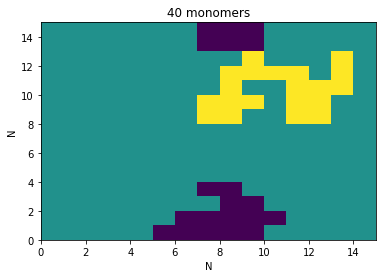

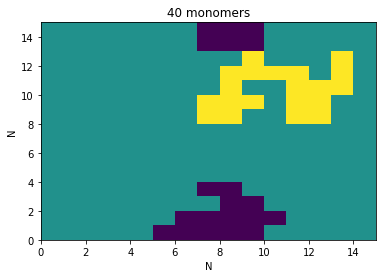

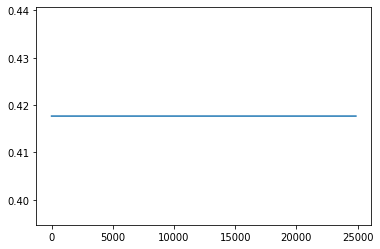

In [484]:
plot_grid(unflexed_grid)
plot_grid(flexed_grid)
plt.plot(np.arange(0, len(flexed_energies), 1), flexed_energies)
plt.show()

##### 2h)

In [57]:
T = 300 #Temperatur i kelvin
t_r = 1000 # 
N = 30
M = 5
L_l = 3
L_h = 39
Steps = 13
LL = np.linspace(L_l,L_h,Steps)
n_samples = 10

def t_equil(L):   #t_equil regner ut hvor mange iterasjoner simulasjonen skal kjøre før den starter prøvetakningen
    tx = t_max * np.exp(-s * (L - L_h)) + C 
    return tx
t_equil(L_h)

def get_Ns(L):  #Ns regner hvor mange iterasjoner simulasjonen skal kjøre. 
    return np.round(t_equil(L) + n_samples * t_r)


def PolySim():

    for i in range(len(LL)):
        grid, polymers = setup_polymers(N, M, LL[i])
        Ns = get_Ns(LL[i])
        it = MCP(int(Ns), T, grid, polymers, medium_flexibility_move)
        print(it[0])
    
Cluster = PolySim()

starting simulation [ T = 300 K, Ns = 139722 , M = 5.0 , N = 30 ]
0.0 %


KeyboardInterrupt: 

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=75bebf44-3a70-48be-871a-1166f77852cb' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>